<a href="https://colab.research.google.com/github/JingyuanWu17/DL/blob/master/hw3prob4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4. **(4 points)** In this programming exercise, we will explore the performance of three different object detection networks. We will be using Detectron2, Facebook AI's object detector library; here is the [repository](https://github.com/facebookresearch/detectron2). It will be helpful to go through the excellent tutorial [here](https://gilberttanner.com/blog/detectron-2-object-detection-with-pytorch).

    a. Download the following [test image](https://images.fineartamerica.com/images-medium-large-5/central-park-balloon-man-madeline-ellis.jpg) (a picture of pedestrians in Central Park). We will run two different detectors on this image.

    b. First, consider the COCO Keypoint Person Detector model with a ResNet50-FPN base network, which is trained to detect human silhouettes. This can be found in the [Detectron2 Model Zoo](https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md) in the "COCO Keypoint" table. Use this model to detect as many silhouttes of people in the test image as you can. You may have to play around with the thresholds to optimize performance.

    c. Second, repeat the above procedure, but with the Mask R-CNN model with ResNet50-FPN backbone, available in the Model Zoo in the "COCO Instance Segmentation" table. This time, you should be able to detect both people as well as other objects in the scene. Comment on your findings.

    d. It appears that the balloons in the test image are not being properly detected in either model. This is because the COCO dataset used to train the above models does not contain balloons! Following the tutorial code above, start with the above pre-trained Mask R-CNN model and train a balloon detector using the (fine-tuning) balloon image dataset provided [here](https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip). Test it on the original test image and show that you are now able to identify all the balloons.



##Tutorial

###Install Detectron2

In [ ]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'
# (add --user if you don't have permission)

###Use pre-train model

In [ ]:
# import some common detectron2 utilities
import detectron2
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2

# get image
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = cv2.imread("./input.jpg")

# Create config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml'))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml')

# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
outputs = predictor(im)

###Display the prediction

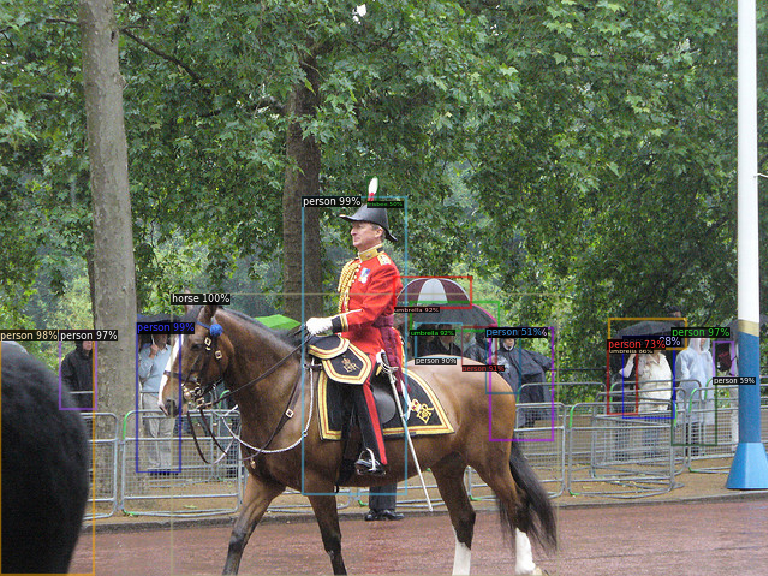

In [ ]:
from google.colab.patches import cv2_imshow

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

###Perform image segmentation

model_final_f10217.pkl: 178MB [00:07, 24.7MB/s]                           


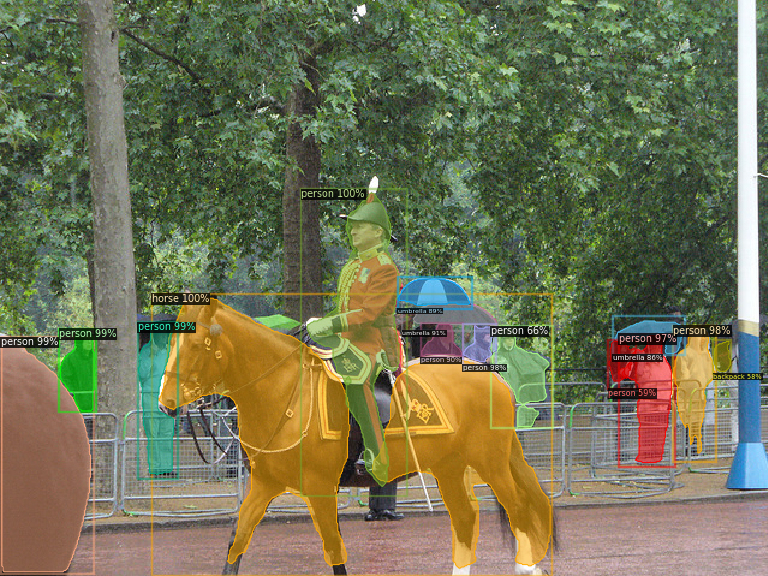

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml'))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml')
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

##Problem 4

--2021-03-08 16:42:12--  https://images.fineartamerica.com/images-medium-large-5/central-park-balloon-man-madeline-ellis.jpg
Resolving images.fineartamerica.com (images.fineartamerica.com)... 204.246.190.47, 204.246.190.51, 204.246.190.59, ...
Connecting to images.fineartamerica.com (images.fineartamerica.com)|204.246.190.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248003 (242K) [image/jpeg]
Saving to: ‘central-park-balloon-man-madeline-ellis.jpg’

central-park-balloo 100%[===================>] 242.19K  --.-KB/s    in 0.006s  

2021-03-08 16:42:12 (38.8 MB/s) - ‘central-park-balloon-man-madeline-ellis.jpg’ saved [248003/248003]



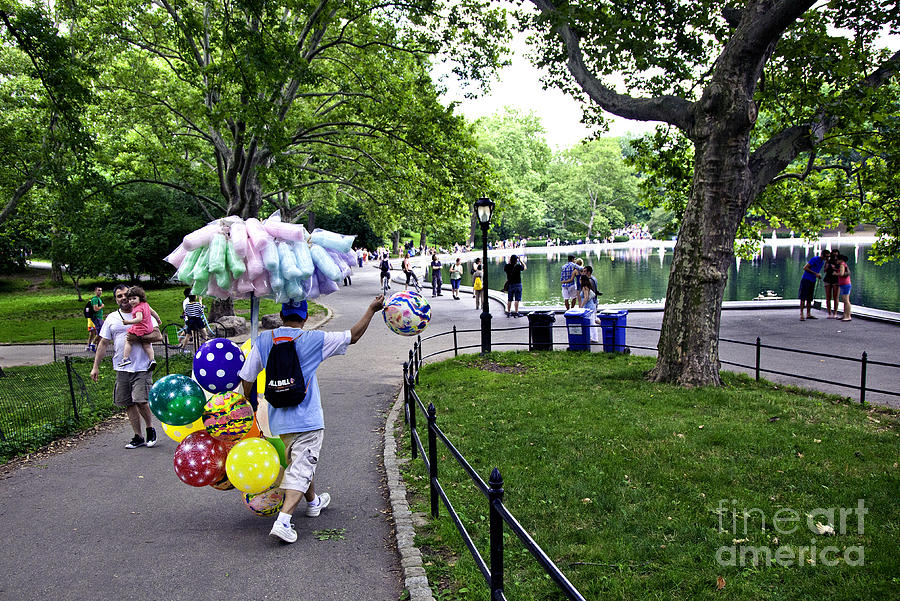

In [ ]:
# 4.a

# Get test image
!wget https://images.fineartamerica.com/images-medium-large-5/central-park-balloon-man-madeline-ellis.jpg -O central-park-balloon-man-madeline-ellis.jpg
image = cv2.imread('central-park-balloon-man-madeline-ellis.jpg') 
cv2_imshow(image)

In [ ]:
## 4.b COCO Keypoint Person Detector model with a ResNet50-FPN base network

# Create config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml'))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml')

# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
outputs_central = predictor(image)

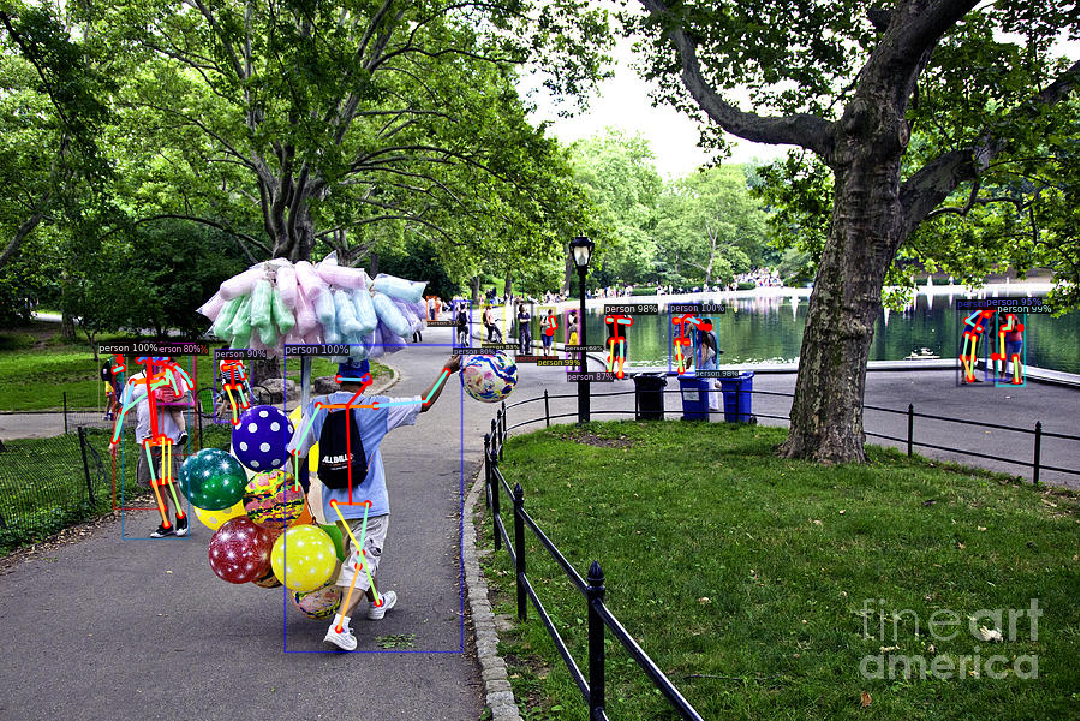

In [ ]:
# Display the prediction
v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs_central["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
# 4.c Mask R-CNN model with ResNet50- FPN backbone
# Create config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml'))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml')

# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
outputs_central_mask = predictor(image)

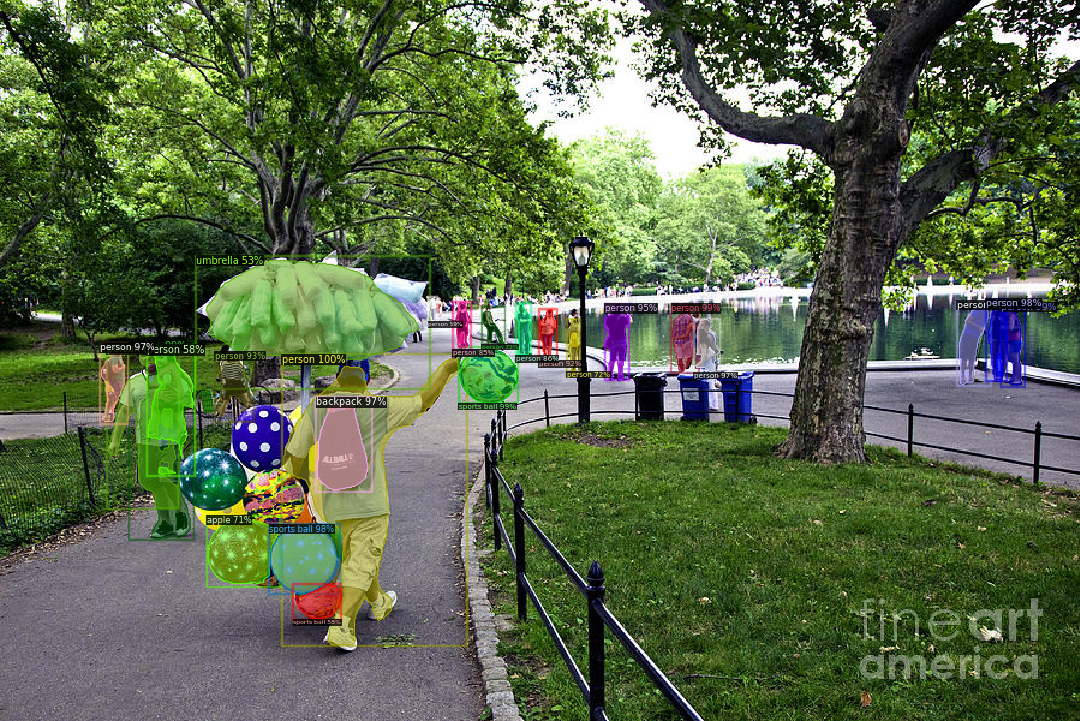

In [ ]:
# Display prediction
v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs_central_mask["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
# 4.d Balloon detector

# download, decompress the data
!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip
!unzip balloon_dataset.zip > /dev/null

In [ ]:
import os
import json
import cv2
import random
import numpy as np
from detectron2.engine import DefaultTrainer
from detectron2.structures import BoxMode
from detectron2.data import MetadataCatalog, DatasetCatalog

# write a function that loads the dataset into detectron2's standard format
def get_balloon_dicts(img_dir):
    json_file = os.path.join(img_dir, "via_region_data.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)

    dataset_dicts = []
    for idx, v in enumerate(imgs_anns.values()):
        record = {}
        
        filename = os.path.join(img_dir, v["filename"])
        height, width = cv2.imread(filename).shape[:2]
        
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
      
        annos = v["regions"]
        objs = []
        for _, anno in annos.items():
            assert not anno["region_attributes"]
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly],
                "category_id": 0,
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

for d in ["train", "val"]:
    DatasetCatalog.register("balloon_" + d, lambda d=d: get_balloon_dicts("balloon/" + d))
    MetadataCatalog.get("balloon_" + d).set(thing_classes=["balloon"])
balloon_metadata = MetadataCatalog.get("balloon_train")

In [ ]:
# Use pre-trained Mask R-CNN model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("balloon_train",)
cfg.DATASETS.TEST = ()  # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025 
cfg.SOLVER.MAX_ITER = 300   # 300 iterations seems good enough, but you can certainly train longer   
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon)
cfg.SOLVER.STEPS = []

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

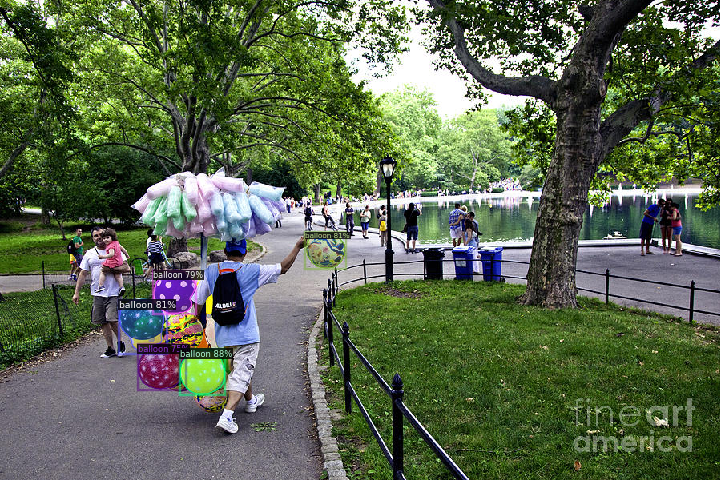

In [ ]:
from detectron2.utils.visualizer import ColorMode

# load weights
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
# Set training data-set path
cfg.DATASETS.TEST = ("balloon/val", )
# Create predictor (model for inference)
predictor = DefaultPredictor(cfg)

im = cv2.imread('central-park-balloon-man-madeline-ellis.jpg')
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                metadata=balloon_metadata, 
                scale=0.8, 
                instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])